## Logistic Regression

### Assignment 1.1: Visualizing the data

In [1]:
import math
import scipy.optimize as op
import matplotlib.pyplot as plt
import numpy as np
from pylab import scatter, show, legend, xlabel, ylabel, contour, title

data = np.genfromtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
print("Dimentions of training samples: [%d" % X.shape[0], ", %d]" % X.shape[1])
print(y.shape)

Dimentions of training samples: [100 , 2]
(100,)


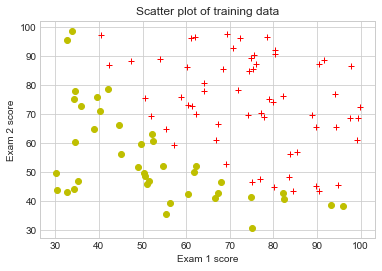

In [2]:
pos_index = np.where(y == 1)[0]
neg_index = np.where(y == 0)[0]

X_pos = X[pos_index, :]
X_neg = X[neg_index, :]

plt.style.use('seaborn-whitegrid')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Scatter plot of training data")
plt.plot(X_pos[:, 0], X_pos[:, 1], 'r+');
plt.plot(X_neg[:, 0], X_neg[:, 1], "yo");

### Assignment 1.2: Implementation

In [3]:
### Implement sigmoid function
def sigmoid(z):
    return np.divide(1, 1 + np.exp(-z))

### Test on sigmoid function
print(sigmoid(0))
print(sigmoid(np.array([0, 100000])))

0.5
[ 0.5  1. ]


In [4]:
### Implement cost function and gradient
def cost_function(theta, X, y):
    m = y.shape[0]
    J_theta = np.sum(np.multiply(-y, np.log(sigmoid(X.dot(theta)))) - np.multiply((1 - y), np.log(1 - sigmoid(X.dot(theta))))) / m
    print("Test", J_theta)
    X_transpose = np.transpose(X)
    grad = X_transpose.dot(sigmoid(X.dot(theta)) - y) / m
    return J_theta, grad
    

In [5]:
### Test on cost function
row, col = X.shape
initial_theta = np.zeros((col + 1, 1))

x0 = np.ones((row, 1))
original_X = X
X = np.append(x0, X, axis=1)
y = y.reshape(row, 1)

In [6]:
cost, grad = cost_function(initial_theta, X, y)
print("Cost at initial theta(zeros): %f" % cost)
print("Expected gradients:\n", grad)

Test 0.69314718056
Cost at initial theta(zeros): 0.693147
Expected gradients:
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [7]:
test_theta = np.array([[-24], [0.2], [0.2]])
cost, grad = cost_function(test_theta, X, y)
print("Cost at initial theta(zeros): %f" % cost)
print("Expected gradients:\n", grad)

Test 0.218330193827
Cost at initial theta(zeros): 0.218330
Expected gradients:
 [[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]]


### Assignment 1.3: Learning parameters using advanced function

In [8]:
### Redefine cost function and gradient since functor parameter can only return one value
def cost_function_modified(theta, X, y):
    m, n = X.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    J_theta = np.sum(np.multiply(-y, np.log(sigmoid(X.dot(theta)))) - np.multiply((1 - y), np.log(1 - sigmoid(X.dot(theta))))) / m
    X_transpose = np.transpose(X)
    grad = X_transpose.dot(sigmoid(X.dot(theta)) - y) / m
    return J_theta

def gradient(theta, X, y):
    m, n = X.shape
    theta = theta.reshape((n,1));
    X_transpose = np.transpose(X)
    grad = X_transpose.dot(sigmoid(X.dot(theta)) - y) / m
    return grad.flatten()
    

def optimize_gradient(theta, X, y):
    Result = op.minimize(fun = cost_function_modified, 
                         x0 = theta, 
                         args = (X, y),
                         method = 'TNC',
                         jac = gradient)
    return Result.x

In [9]:
optimal_theta = optimize_gradient(initial_theta, X, y)
print(optimal_theta)

[-25.16131843   0.20623159   0.20147148]


### Assignment 1.4: Evaluating logistic regression

In [10]:
### Predict on training data
def predict(theta, X):
    m, n = X.shape
    p = sigmoid(X.dot(theta))
    positive_index = np.where(p > 0.5)[0]
    negative_index = np.where(p <= 0.5)[0]
    p[positive_index] = 1
    p[negative_index] = 0
    return p

In [11]:
test_X = np.array([[1, 45, 85]])
prob = sigmoid(test_X.dot(optimal_theta))
print("Expected value: 0.775 +/- 0.002, got value %f" % prob)

train_result = data[:, 2]
predicted_values = predict(optimal_theta, X)
print('Trainning Accuracy: %f' % ((train_result[np.where(predicted_values == train_result)].size / float(train_result.size)) * 100.0))

Expected value: 0.775 +/- 0.002, got value 0.776291
Trainning Accuracy: 89.000000


## Regularized logistic regression

### Assignment 2.1: Visualizing the data

In [12]:
data_reg = np.genfromtxt('ex2data2.txt', delimiter=',')
X_reg = data_reg[:, :2]
y_reg = data_reg[:, 2]
print("Dimentions of regularized training samples: [%d" % X_reg.shape[0], ", %d]" % X_reg.shape[1])

Dimentions of regularized training samples: [118 , 2]


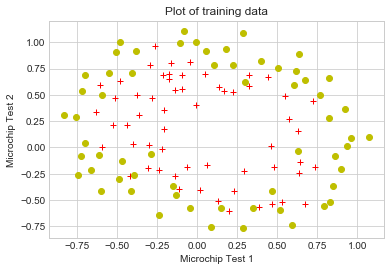

In [13]:
pos_index = np.where(y_reg == 1)[0]
neg_index = np.where(y_reg == 0)[0]

X_pos = X_reg[pos_index, :]
X_neg = X_reg[neg_index, :]

plt.style.use('seaborn-whitegrid')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("Plot of training data")
plt.plot(X_pos[:, 0], X_pos[:, 1], 'r+');
plt.plot(X_neg[:, 0], X_neg[:, 1], "yo");

### Assignment 2.2: Feature mapping

In [14]:
### Expand 2-Dimensional feature set to 28-Dimensional
def mapFeature(x1, x2):
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)
    return out

In [15]:
### Expand features
X_reg = mapFeature(X_reg[:, 0], X_reg[:, 1])

### Initialize theta
initial_theta = np.zeros((X_reg.shape[1], 1))
test_theta = np.ones((X_reg.shape[1], 1))

### Initialize lambda
initial_lambda = 1

### Assignment 2.3: Cost function and gradient

In [41]:
def cost_function_reg(theta, X, y, initial_lambda):
    m, n = X.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    theta_reg = theta[1:, :]
    X_nonreg = X[1:, :]
    J_nonreg = np.sum(np.multiply(-y, np.log(sigmoid(X.dot(theta)))) - np.multiply((1 - y), np.log(1 - sigmoid(X.dot(theta))))) / m
    J_reg = J_nonreg + initial_lambda / (2 * m) * np.sum(theta_reg ** 2)
    return J_reg

def gradient_reg(theta, X, y, initial_lambda):
    m, n = X.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    theta_reg = theta
    theta_reg[0, 0] = 0.0
    X_transpose = np.transpose(X)
    grad_nonreg = X_transpose.dot(sigmoid(X.dot(theta)) - y) / m
    grad_reg = grad_nonreg + np.multiply(theta_reg, (initial_lambda / m))
    return grad_reg.flatten()

def optimize_gradient_reg(theta, X, y, initial_lambda):
    Result = op.minimize(fun = cost_function_reg, 
                         x0 = theta, 
                         args = (X, y, initial_lambda),
                         method = 'TNC',
                         jac = gradient_reg)
    return Result.x


In [42]:
cost = cost_function_reg(initial_theta, X_reg, y_reg, initial_lambda)
gradient = gradient_reg(initial_theta, X_reg, y_reg, initial_lambda)
print("J(theta) =[%f]" % cost)
print("Gradient(First five elements): \n", gradient[0:5])

cost_test = cost_function_reg(test_theta, X_reg, y_reg, 10.0)
gradient_test = gradient_reg(test_theta, X_reg, y_reg, 10.0)
print("\nJ(theta) =[%f]" % cost_test)
print("Gradient(First five elements): \n", gradient_test[0:5])

J(theta) =[0.693147]
Gradient(First five elements): 
 [  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02]

J(theta) =[2.885137]
Gradient(First five elements): 
 [ 0.20598218  0.18102403  0.20272661  0.19863458  0.10254902]


In [27]:
optimal_theta_1 = optimize_gradient_reg(initial_theta, X_reg, y_reg, 1.0)
optimal_theta_10 = optimize_gradient_reg(initial_theta, X_reg, y_reg, 10.0)
optimal_theta_100 = optimize_gradient_reg(initial_theta, X_reg, y_reg, 100.0)

### Assignment 2.4: Plotting the decision boundary

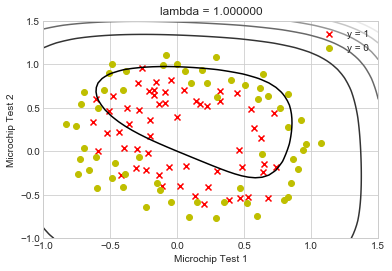

In [28]:
### Plot Boundary
scatter(X_pos[:, 0], X_pos[:, 1], marker='x', c='r')
scatter(X_neg[:, 0], X_neg[:, 1], marker='o', c='y')

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = (mapFeature(np.array(u[i]), np.array(v[j])).dot(np.array(optimal_theta_10)))

z = z.T
contour(u, v, z)
title('lambda = %f' % 1)
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
legend(['y = 1', 'y = 0', 'Decision boundary'])
show()

In [30]:
train_result = data_reg[:, 2]
predicted_values = predict(optimal_theta_1, X_reg)
print('Trainning Accuracy with Regularization: %f' % ((train_result[np.where(predicted_values == train_result)].size / float(train_result.size)) * 100.0))

Trainning Accuracy with Regularization: 66.101695
